In [9]:
import numpy as np
import matplotlib.pyplot as plt
import skfem as fem


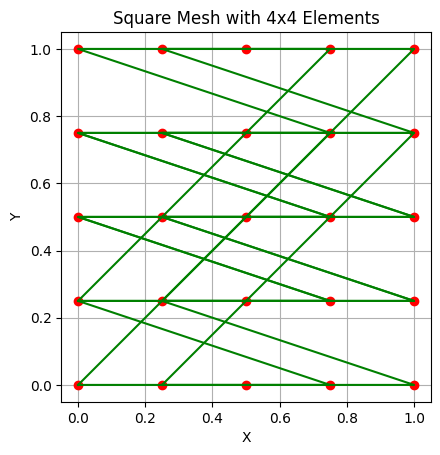

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import skfem as fem

# Define the number of elements in each direction
n_elem = 4  # You can adjust this value

# Create a mesh grid
x_grid = np.linspace(0.0, 1.0, n_elem + 1)
y_grid = np.linspace(0.0, 1.0, n_elem + 1)

# Create an empty list to store vertices
vertices = []

# Generate vertices
for y in y_grid:
    for x in x_grid:
        vertices.append([x, y])

vertices = np.array(vertices)

# Create elements (quadrilateral elements)
elements = []
for i in range(n_elem):
    for j in range(n_elem):
        # Define the indices of the vertices for each element
        v0 = i * (n_elem + 1) + j
        v1 = v0 + 1
        v2 = v0 + (n_elem + 1)
        v3 = v2 + 1
        elements.append([v0, v1, v3, v2])

elements = np.array(elements)

# Create a mesh
mesh = fem.Mesh(vertices, elements)

# Extract the vertices and elements for plotting
vertices = mesh.p.T
elements = mesh.t.T

# Plot the mesh using matplotlib
plt.figure()
plt.plot(vertices[0], vertices[1], 'ro')  # Plot vertices as red dots

# Plot the elements (lines connecting vertices)
for element in elements:
    element = np.append(element, element[0])  # Close the element loop
    plt.plot(vertices[0, element], vertices[1, element], 'g-')

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Square Mesh with {n_elem}x{n_elem} Elements')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()

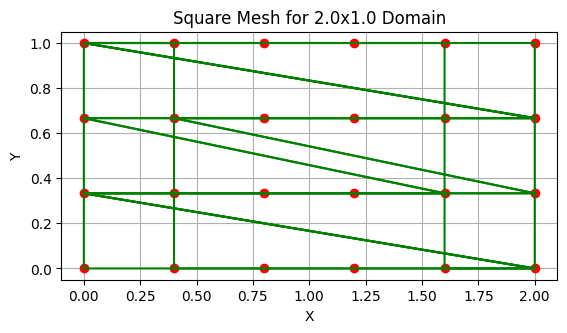

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import skfem as fem

# Define the dimensions of the domain
width = 2.0  # Width of the domain
height = 1.0  # Height of the domain

# Define the number of elements in each direction
n_elem_x = 5  # Number of elements in the x-direction
n_elem_y = 3  # Number of elements in the y-direction

# Create a mesh grid
x_grid = np.linspace(0.0, width, n_elem_x + 1)
y_grid = np.linspace(0.0, height, n_elem_y + 1)

# Create an empty list to store vertices
vertices = []

# Generate vertices
for y in y_grid:
    for x in x_grid:
        vertices.append([x, y])

vertices = np.array(vertices)

# Create elements (quadrilateral elements)
elements = []
for i in range(n_elem_x):
    for j in range(n_elem_y):
        # Define the indices of the vertices for each element
        v0 = i * (n_elem_y + 1) + j
        v1 = v0 + 1
        v2 = v0 + (n_elem_y + 1)
        v3 = v2 + 1
        elements.append([v0, v1, v3, v2])

elements = np.array(elements)

# Create a mesh
mesh = fem.Mesh(vertices, elements)

# Extract the vertices and elements for plotting
vertices = mesh.p.T
elements = mesh.t.T

# Plot the mesh using matplotlib
plt.figure()
plt.plot(vertices[0], vertices[1], 'ro')  # Plot vertices as red dots

# Plot the elements (lines connecting vertices)
for element in elements:
    element = np.append(element, element[0])  # Close the element loop
    plt.plot(vertices[0, element], vertices[1, element], 'g-')

plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Square Mesh for {width}x{height} Domain')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()


IndexError: index 22 is out of bounds for axis 1 with size 21

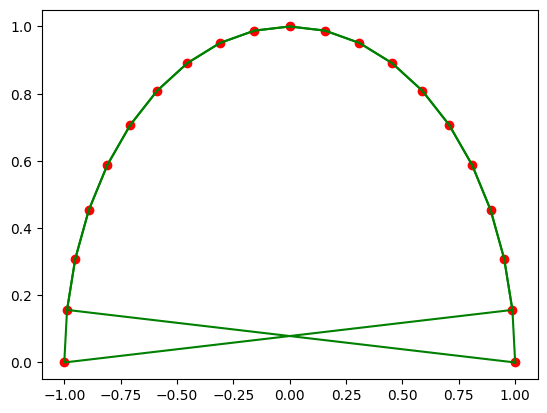

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import skfem as fem

# Define a parametric representation of the curved boundary (e.g., Bézier curve)
def curved_boundary(t):
    x = np.cos(np.pi * t)
    y = np.sin(np.pi * t)
    return x, y

# Define the number of elements
n_elem = 20

# Generate nodes on the curved boundary
t_values = np.linspace(0, 1, n_elem + 1)
boundary_nodes = [curved_boundary(t) for t in t_values]

# Create an empty list to store vertices
vertices = []

# Generate vertices by discretizing the curved boundary
for x, y in boundary_nodes:
    vertices.append([x, y])

vertices = np.array(vertices)

# Create elements (quadrilateral elements)
elements = []
for i in range(n_elem):
    v0 = i
    v1 = i + 1
    v2 = i + n_elem + 2
    v3 = i + n_elem + 1
    elements.append([v0, v1, v2, v3])

elements = np.array(elements)

# Create a mesh
mesh = fem.Mesh(vertices, elements)

# Extract the vertices and elements for plotting
vertices = mesh.p.T
elements = mesh.t.T

# Plot the mesh using matplotlib
plt.figure()
plt.plot(vertices[0], vertices[1], 'ro')  # Plot vertices as red dots

# Plot the elements (lines connecting vertices)
for element in elements:
    element = np.append(element, element[0])  # Close the element loop
    plt.plot(vertices[0, element], vertices[1, element], 'g-')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mesh for Curved Boundary')
plt.gca().set_aspect('equal')
plt.grid(True)
plt.show()
